In [ ]:
# test dataloader
import tensorflow_datasets as tfds

path = '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/9'
datasetbuilder = tfds.builder_from_directory(path)

print(datasetbuilder)


In [5]:
#  Date: 2025-02-18 BUG: 用minivla 的conda 环境读发现会报tensorflow 版本的错误，我担心会导致openvla 训练的时候读取数据失败
dataset = datasetbuilder.as_dataset(split='train')


2025-02-19 07:48:39.941001: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-19 07:48:39.975612: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-19 07:48:39.976685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-19 07:48:40.593913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-02-19 07:48:41.594553: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for ho

In [8]:
datasetbuilder.info.name

'put the black bowl on the plate'

1.0 tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
1.0 tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
1.0 tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
0.0 tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool)
1.0 tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(False, shape=(), dtype=bool) tf.Tensor(True, shape=(), dtype=bool)
dict_keys(['action', 'discount', 'is_first', 'is_last', 'is_terminal', 'observation', 'reward'])
dict_keys(['agentview_image', 'akita_black_bowl_1_pos', 'akita_black_bowl_1_quat', 'akita_black_bowl_1_to_robot0_eef_pos', 'akita_black_bowl_1_to_robot0_eef_quat', 'object-state', 'plate_1_pos', 'plate_1_quat', 'plate_1_to_robot0_eef_pos', 'plate_1_to_robot0_eef_quat', 'robot0_eef_pos', 'robot0_eef_quat',

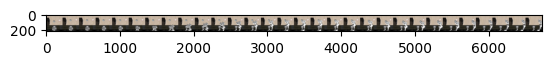

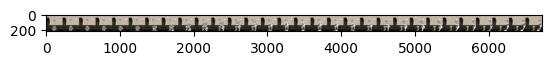

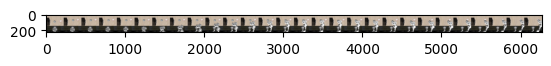

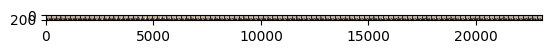

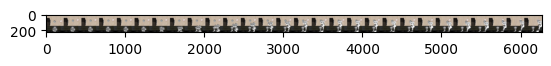

In [6]:
# visualize dataset
import numpy as np 
import matplotlib.pyplot as plt

for i, episode in enumerate(dataset):
    images = []
    rewards = []
    for step in episode['steps']:
        images.append(step['observation']['agentview_image'].numpy())
        rewards.append(step['reward'])
    image_strip = np.concatenate(images[::4], axis=1)
    # caption = step['language_instruction'].numpy().decode() + ' (temp. downsampled 4x)'
    print(np.sum(rewards), step['is_terminal'], step['is_first'], step['is_last'])
    plt.figure()
    plt.imshow(image_strip)
    # plt.title(caption)
print(step.keys())
print(step['observation'].keys())

In [20]:
episode.get_rlds_episode()

AttributeError: 'dict' object has no attribute 'get_rlds_episode'

In [10]:
# which step get reward 1

np.argmax(rewards), len(rewards), rewards[-10:]

(107,
 109,
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.0>])

In [13]:
step['observation']['robot0_proprio-state'].shape, step['observation']['robot0_eye_in_hand_image'].shape

(TensorShape([39]), TensorShape([224, 224, 3]))

In [7]:
import glob
overview_path = "/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test"
episode_paths = glob.glob(overview_path + "/*") # 获取所有episode 的路径
episode_paths

['/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/0',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/1',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/10',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/11',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/12',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/13',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/14',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/15',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/16',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/17',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero

In [3]:
import tensorflow as tf

def _parse_dataset(dataset):
    datasetbuilder = tfds.builder_from_directory(path)
    dataset_name = datasetbuilder.info.name
    dataset = datasetbuilder.as_dataset(split='train')
    def rename_and_add_instruction_step(step):
        """
        1. Rename the "agentview_image" key in each step to "image".
        2. Add a "language_instruction" field with the value of dataset_name.
        """
        new_step = {}
        new_step['language_instruction'] = dataset_name
        new_step['observation']['image'] = step['observation'].pop('agentview_image')
        new_step['observation']['wrist_image'] = step['observation'].pop('robot0_eye_in_hand_image')
        new_step['observation']['state'] = step['observation'].pop('robot0_proprio-state')
        step = step.pop('observation')
        new_step.update({k: step[k] for k in step.keys()})
        return new_step

    def rename_and_add_instruction(episode):
        # Update the episode with modified steps
        episode['steps'] = episode['steps'].map(rename_and_add_instruction_step)
        return episode

    # Use map() to process the dataset in bulk
    new_dataset = dataset.map(rename_and_add_instruction)
    return new_dataset

path = '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/'
new_dataset = _parse_dataset(path + '1')
for i in range(1, 90):
    path = '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/' + str(i)
    new_dataset = new_dataset.concatenate(_parse_dataset(path))


In [9]:
import tensorflow as tf
# 把dataset 保存到磁盘, 但不是标准的RLDS 格式
new_dataset_2 = new_dataset.concatenate(new_dataset)
new_dataset_2.save("merged_dataset_path")

Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.
/home/v-rusyang/miniconda3/envs/rlds_env/lib/python3.9/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:475: UserWarning: Encoding a StructuredValue with type tf.NoneTensorSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
2025-02-18 13:06:57.966208: E tensorflow/core/framework/dataset.cc:109] The Encode() method is not implemented for DatasetVariantWrapper objects.
2025-02-18 13:06:57.973670: E tensorflow/core/framework/dataset.cc:109] The Encode() method is not implemented for DatasetVariantWrapper objects.
2025-02-18 13:06:57.980557: E tensorflow/core/framework/dataset.cc:109] The Encode() method is not implemented for DatasetVariantWrapper objects.
2025-02-18 13:06:58.017747: E tensorflow/core/framework/dataset.cc:109] The Encode() method is not implemented for DatasetVariantWrapper 

In [15]:
datasetbuilder.info.features['steps']['observation']

FeaturesDict({
    'agentview_image': Image(shape=(224, 224, 3), dtype=uint8),
    'akita_black_bowl_1_pos': Tensor(shape=(3,), dtype=float32),
    'akita_black_bowl_1_quat': Tensor(shape=(4,), dtype=float32),
    'akita_black_bowl_1_to_robot0_eef_pos': Tensor(shape=(3,), dtype=float32),
    'akita_black_bowl_1_to_robot0_eef_quat': Tensor(shape=(4,), dtype=float32),
    'object-state': Tensor(shape=(28,), dtype=float32),
    'plate_1_pos': Tensor(shape=(3,), dtype=float32),
    'plate_1_quat': Tensor(shape=(4,), dtype=float32),
    'plate_1_to_robot0_eef_pos': Tensor(shape=(3,), dtype=float32),
    'plate_1_to_robot0_eef_quat': Tensor(shape=(4,), dtype=float32),
    'robot0_eef_pos': Tensor(shape=(3,), dtype=float32),
    'robot0_eef_quat': Tensor(shape=(4,), dtype=float32),
    'robot0_eye_in_hand_image': Image(shape=(224, 224, 3), dtype=uint8),
    'robot0_gripper_qpos': Tensor(shape=(2,), dtype=float32),
    'robot0_gripper_qvel': Tensor(shape=(2,), dtype=float32),
    'robot0_joint

In [4]:
# TODO: 把observation——info 的key 改成image, 再加一个language_instruction, wirst_image, state 这些字段。
# TODO: 加success 到 metadata

mapping_dict ={
    "agentview_image": "image",
    "robot0_eye_in_hand_image": "wrist_image",
    "robot0_proprio-state": "state",
}

tmp_dict = {}
for key, value in datasetbuilder.info.features['steps']['observation'].items(): 
    if key in mapping_dict:
        tmp_dict[mapping_dict[key]] = value
    # DROP these keys
    # else:
    #     tmp_dict[key] = value

observation_info = tfds.features.FeaturesDict(tmp_dict)

observation_info.items()
action_info = datasetbuilder.info.features['steps']['action']
reward_info = datasetbuilder.info.features['steps']['reward']
discount_info = datasetbuilder.info.features['steps']['discount']

ds_config: tfds.rlds.rlds_base.DatasetConfig = tfds.rlds.rlds_base.DatasetConfig(
    name="merged_libero_dataset_from_minivla",
    observation_info=observation_info,
    action_info=action_info,
    reward_info=reward_info,
    discount_info=discount_info,
)
split_name = 'train'

version = '0.0.1'
max_episodes_per_file = 1000
data_directory = "merged_dataset_path"
metadata = None

ds_identity = tfds.core.dataset_info.DatasetIdentity(
    name=ds_config.name,
    version=tfds.core.Version(version),
    data_dir=data_directory,
    module_name='')

ds_info = tfds.rlds.rlds_base.build_info(ds_config, ds_identity,
                                            metadata)
ds_info.set_file_format('tfrecord')

sequential_writer = tfds.core.SequentialWriter(
    ds_info, max_episodes_per_file)

sequential_writer.initialize_splits([split_name])
print('data_directory: %r', data_directory)


NameError: name 'datasetbuilder' is not defined

In [ ]:
for episode in new_dataset_2.take(4):
    sequential_writer.add_examples({split_name: [episode]})

sequential_writer.close_all()


In [4]:
# algorithm for parse the dataset
from typing import Dict
import glob
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tqdm import tqdm
import tensorflow_datasets as tfds
import numpy as np

overview_path = "/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test"
episode_paths = glob.glob(overview_path + "/*") # get all episode paths

split_name = 'train'
version = '0.0.1'
max_episodes_per_file = 1000
data_directory = "./merged_dataset"
metadata = None

# define wrtriter
def define_writer():
    # random select one dataset path
    datasetbuilder = tfds.builder_from_directory(overview_path +"/" + str(np.random.randint(0, 90)))

    mapping_dict ={
        "agentview_image": "image",
        "robot0_eye_in_hand_image": "wrist_image",
        "robot0_proprio-state": "state",
    }

    tmp_dict = {}
    for key, value in datasetbuilder.info.features['steps']['observation'].items():
        if key in mapping_dict:
            tmp_dict[mapping_dict[key]] = value
        # DROP these keys
        # else:
        #     tmp_dict[key] = value

    observation_info = tfds.features.FeaturesDict(tmp_dict)

    observation_info.items()
    action_info = datasetbuilder.info.features['steps']['action']
    reward_info = datasetbuilder.info.features['steps']['reward']
    discount_info = datasetbuilder.info.features['steps']['discount']

    ds_config: tfds.rlds.rlds_base.DatasetConfig = tfds.rlds.rlds_base.DatasetConfig(
        name="merged_libero_dataset_from_minivla",
        observation_info=observation_info,
        action_info=action_info,
        reward_info=reward_info,
        discount_info=discount_info,
    )

    ds_identity = tfds.core.dataset_info.DatasetIdentity(
        name=ds_config.name,
        version=tfds.core.Version(version),
        data_dir=data_directory,
        module_name='')

    ds_info = tfds.rlds.rlds_base.build_info(ds_config, ds_identity,
                                                metadata)
    ds_info.set_file_format('tfrecord')

    sequential_writer = tfds.core.SequentialWriter(
        ds_info, max_episodes_per_file)

    sequential_writer.initialize_splits([split_name], fail_if_exists=True)
    print('data_directory: %r', data_directory)
    return sequential_writer

# define parser
def _parse_dataset(episode_path):
    # read the dataset
    datasetbuilder = tfds.builder_from_directory(episode_path)
    dataset_name = datasetbuilder.info.name
    dataset = datasetbuilder.as_dataset(split='train')
    # parse the dataset
    def rename_and_add_instruction_step(step):
        """
        1. Rename the "agentview_image" key in each step to "image".
        2. Add a "language_instruction" field with the value of dataset_name.
        """
        new_step = {}
        new_step['language_instruction'] = dataset_name
        new_step.update({'observation': {
            'image': step['observation'].pop('agentview_image'),
            'wrist_image': step['observation'].pop('robot0_eye_in_hand_image'),
            'state': step['observation'].pop('robot0_proprio-state')
        }})
        step.pop('observation')
        new_step.update({k: step[k] for k in step.keys()})

        # BUG: 需要先在eager mode 下运行，否则会报错，但是不会弄。
        # # convert to numpy
        # def convert_to_numpy(v, sess):
        #     if isinstance(v, Dict):
        #         return {k: convert_to_numpy(v[k], sess) for k in v.keys()}
        #     elif isinstance(v, tf.Tensor):
        #         return sess.run(v)
        #     else:
        #         return v
        # with tf.compat.v1.Session() as sess:
        #     new_step = convert_to_numpy(new_step, sess)

        return new_step

    def rename_and_add_instruction(episode) -> Dict:
        # Update the episode with modified steps
        episode['steps'] = episode['steps'].map(rename_and_add_instruction_step)
        return episode

    # Use map() to process the dataset in bulk
    new_dataset = dataset.map(rename_and_add_instruction)
    return new_dataset

sequential_writer = define_writer()
# parse all dataset
for episode_path in tqdm(episode_paths):
    # parse the episode
    dataset = _parse_dataset(episode_path)
    # save the episode to writter
    for episode in dataset:
        sequential_writer.add_examples({split_name: [episode]})
        # TODO 增加 success 到 episode metadata


# save the dataset to the disk


100%|██████████| 90/90 [00:22<00:00,  4.01it/s]


In [ ]:
dataset.save("merged_dataset_path")

In [1]:
# test dataloader
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

path = '/home/v-rusyang/tensorflow_datasets/libero_dataset/1.0.0'
datasetbuilder = tfds.builder_from_directory(path)
dataset = datasetbuilder.as_dataset(split='train')
for i, episode in enumerate(dataset):
    if i > 3:
        break
    images = []
    rewards = []
    for step in episode['steps']:
        images.append(step['observation']['image'].numpy())
        rewards.append(step['reward'])
    image_strip = np.concatenate(images[::4], axis=1)
    # caption = step['language_instruction'].numpy().decode() + ' (temp. downsampled 4x)'
    print(np.sum(rewards), step['is_terminal'], step['is_first'], step['is_last'])
    plt.figure()
    plt.imshow(image_strip)



/home/v-rusyang/miniconda3/envs/rlds_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: Could not load dataset info from /home/v-rusyang/tensorflow_datasets/libero_dataset/1.0.0/dataset_info.json

In [11]:
# TEST the function:
from typing import Iterator, Tuple, Any

import glob
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
# import tensorflow_hub as hub

def split_success_and_false_trajectory(dataset: tf.data.Dataset):
    """Split the dataset into success and false trajectory."""

    def reduction_fn(episode):
        total_reward = 0.0
        for step in episode['steps']:
            total_reward += step['reward']
        episode_success = total_reward > 0
        episode['success'] = episode_success
        return episode

    dataset_with_success_label = dataset.map(reduction_fn)
    success_dataset = dataset_with_success_label.filter(lambda x: x['success'])
    false_dataset = dataset_with_success_label.filter(lambda x: not x['success'])
    def get_dataset_size(dataset):
        size = 0
        for _ in dataset:  # 遍历数据集
            size += 1
        return size
    total_size = get_dataset_size(dataset)
    success_size = get_dataset_size(success_dataset)
    false_size = get_dataset_size(false_dataset)
    print(f"total_size: {total_size}, success_size: {success_size}, false_size: {false_size}")
    assert total_size == success_size + false_size, f"total_size: {total_size} != success_size: {success_size} + false_size: {false_size}"
    return success_dataset, false_dataset, success_size > 0 and false_size > 0

for i in range(90):
    task_path = "/home/v-rusyang/shared_data/dataset/libero_minivla_raw_dataset_from_envlogger/COLLECT-libero_90-minivla-2025_02_24-08_19_33--collect libero90 data/" + str(i)
    datasetbuilder = tfds.builder_from_directory(task_path)     # this is a list of dicts in our case
    language_instruction = datasetbuilder.info.name
    dataset = datasetbuilder.as_dataset(split='train')

    success_dataset, false_dataset, legally_split = split_success_and_false_trajectory(dataset)

total_size: 10, success_size: 10, false_size: 0
total_size: 10, success_size: 6, false_size: 4
total_size: 10, success_size: 10, false_size: 0
total_size: 10, success_size: 3, false_size: 7
total_size: 10, success_size: 9, false_size: 1
total_size: 10, success_size: 3, false_size: 7
total_size: 10, success_size: 4, false_size: 6
total_size: 10, success_size: 8, false_size: 2
total_size: 10, success_size: 6, false_size: 4


KeyboardInterrupt: 

In [ ]:
task_path = "/home/v-rusyang/shared_data/dataset/libero_minivla_raw_dataset_from_envlogger/COLLECT-libero_90-minivla-2025_03_28-03_45_32--pick_some_task_around50_more_traj_for_debug/44"
datasetbuilder = tfds.builder_from_directory(task_path)
dataset = datasetbuilder.as_dataset(split='train')


In [14]:
for episode in dataset.take(1):
    print(episode.keys())
    for step in episode['steps']:
        print(step.keys())
        print(step['observation'].keys())
        break

dict_keys(['steps'])
dict_keys(['action', 'discount', 'is_first', 'is_last', 'is_terminal', 'observation', 'reward'])
dict_keys(['agentview_image', 'chefmate_8_frypan_1_pos', 'chefmate_8_frypan_1_quat', 'chefmate_8_frypan_1_to_robot0_eef_pos', 'chefmate_8_frypan_1_to_robot0_eef_quat', 'object-state', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_proprio-state', 'white_bowl_1_pos', 'white_bowl_1_quat', 'white_bowl_1_to_robot0_eef_pos', 'white_bowl_1_to_robot0_eef_quat'])
